In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# a) Read test and label files
test_df = pd.read_csv("test.csv")
label_df = pd.read_csv("test_label.csv")

In [6]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.000340,0.000432,0.000000,0.0,0.694290,0.038316,0.0,0.000000,0.0,...,0.0,0.50,0.036442,0.000000,0.0,0.023256,0.055147,0.055147,0.0,0.0
1,0.0,0.000510,0.000576,0.000000,0.0,0.694702,0.038856,0.0,0.427536,0.0,...,0.0,0.25,0.025862,0.000000,0.0,0.028623,0.040441,0.040441,0.0,0.0
2,0.0,0.000510,0.000576,0.000000,0.0,0.694908,0.038856,0.0,0.000000,0.0,...,0.0,0.25,0.307994,0.013699,0.0,0.026834,0.183824,0.180147,0.0,0.0
3,0.0,0.000170,0.000432,0.000000,0.0,0.695114,0.038856,0.0,0.007246,0.0,...,0.0,0.25,0.026254,0.000000,0.0,0.030411,0.047794,0.047794,0.0,0.0
4,0.0,0.000935,0.000720,0.000336,0.0,0.695733,0.039935,0.0,0.000000,0.0,...,0.0,0.25,0.014107,0.000000,0.0,0.028623,0.033088,0.029412,0.0,0.0


In [15]:
test_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37'],
      dtype='object')

In [7]:
label_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [17]:
label_df.columns

Index(['0'], dtype='object')

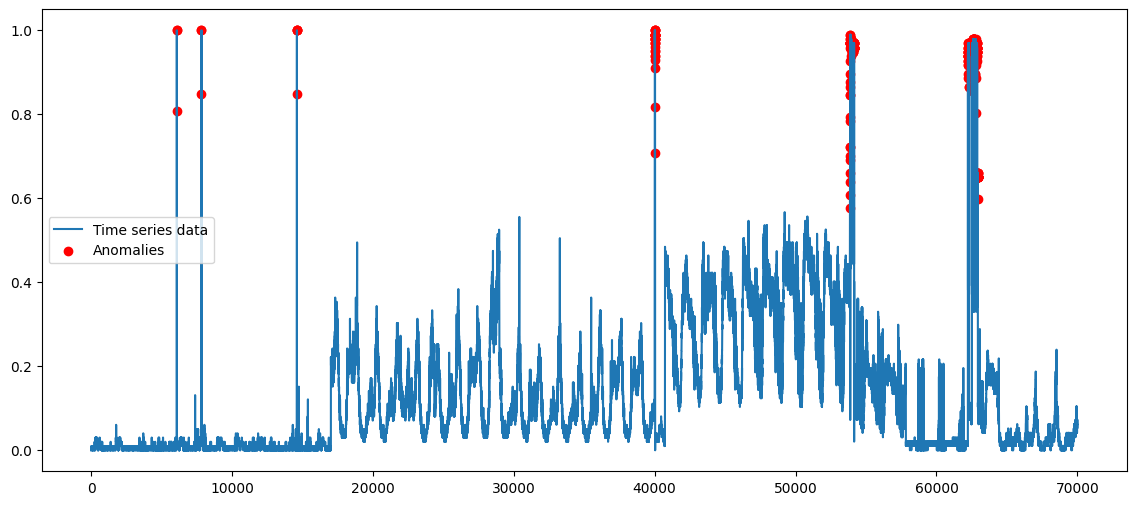

In [27]:
# b) Draw time series plots with anomaly regions

from scipy import stats

# Calculate Z-scores
test_df['z_score'] = stats.zscore(test_df['0'])

# Define a threshold for outliers
threshold = 3

# Create a new column 'outlier' that is True when the absolute z_score is above the threshold
test_df['anomaly'] = abs(test_df['z_score']) > threshold

# Plot time series data
plt.figure(figsize=(14,6))
plt.plot(test_df.index, test_df['0'], label='Time series data')

# Plot outliers in red
plt.scatter(test_df[test_df['anomaly']].index, test_df[test_df['anomaly']]['0'], color='r', label='Anomalies')
plt.legend()
plt.show()


In [20]:
# c) Perform EDA and find out root cause

test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,anomaly
count,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.0,70001.000000,70001.000000,...,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.0,70001.0,70001.000000
mean,0.125281,0.025424,0.034415,0.037462,0.322057,0.459721,0.336344,0.0,0.011226,0.000749,...,0.169050,0.191246,0.104893,0.018708,0.051599,0.269691,0.229657,0.0,0.0,0.000029
std,0.148530,0.072388,0.088629,0.093520,0.456736,0.347015,0.312518,0.0,0.056158,0.015199,...,0.075581,0.170423,0.187695,0.054665,0.047420,0.213860,0.230937,0.0,0.0,0.005345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.010309,0.001495,0.001873,0.002546,0.000000,0.068121,0.060259,0.0,0.000058,0.000000,...,0.125000,0.061520,0.000000,0.000000,0.013514,0.099265,0.042573,0.0,0.0,0.000000
50%,0.070707,0.004785,0.005242,0.006364,0.000000,0.534963,0.309052,0.0,0.001867,0.000000,...,0.149425,0.137931,0.001101,0.000000,0.028623,0.224793,0.137634,0.0,0.0,0.000000
75%,0.191919,0.020927,0.029270,0.031797,0.976471,0.685973,0.346061,0.0,0.006221,0.000000,...,0.218391,0.254096,0.114316,0.000000,0.089041,0.396694,0.391304,0.0,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.976471,1.000000,1.000000,0.0,1.000000,1.000000,...,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


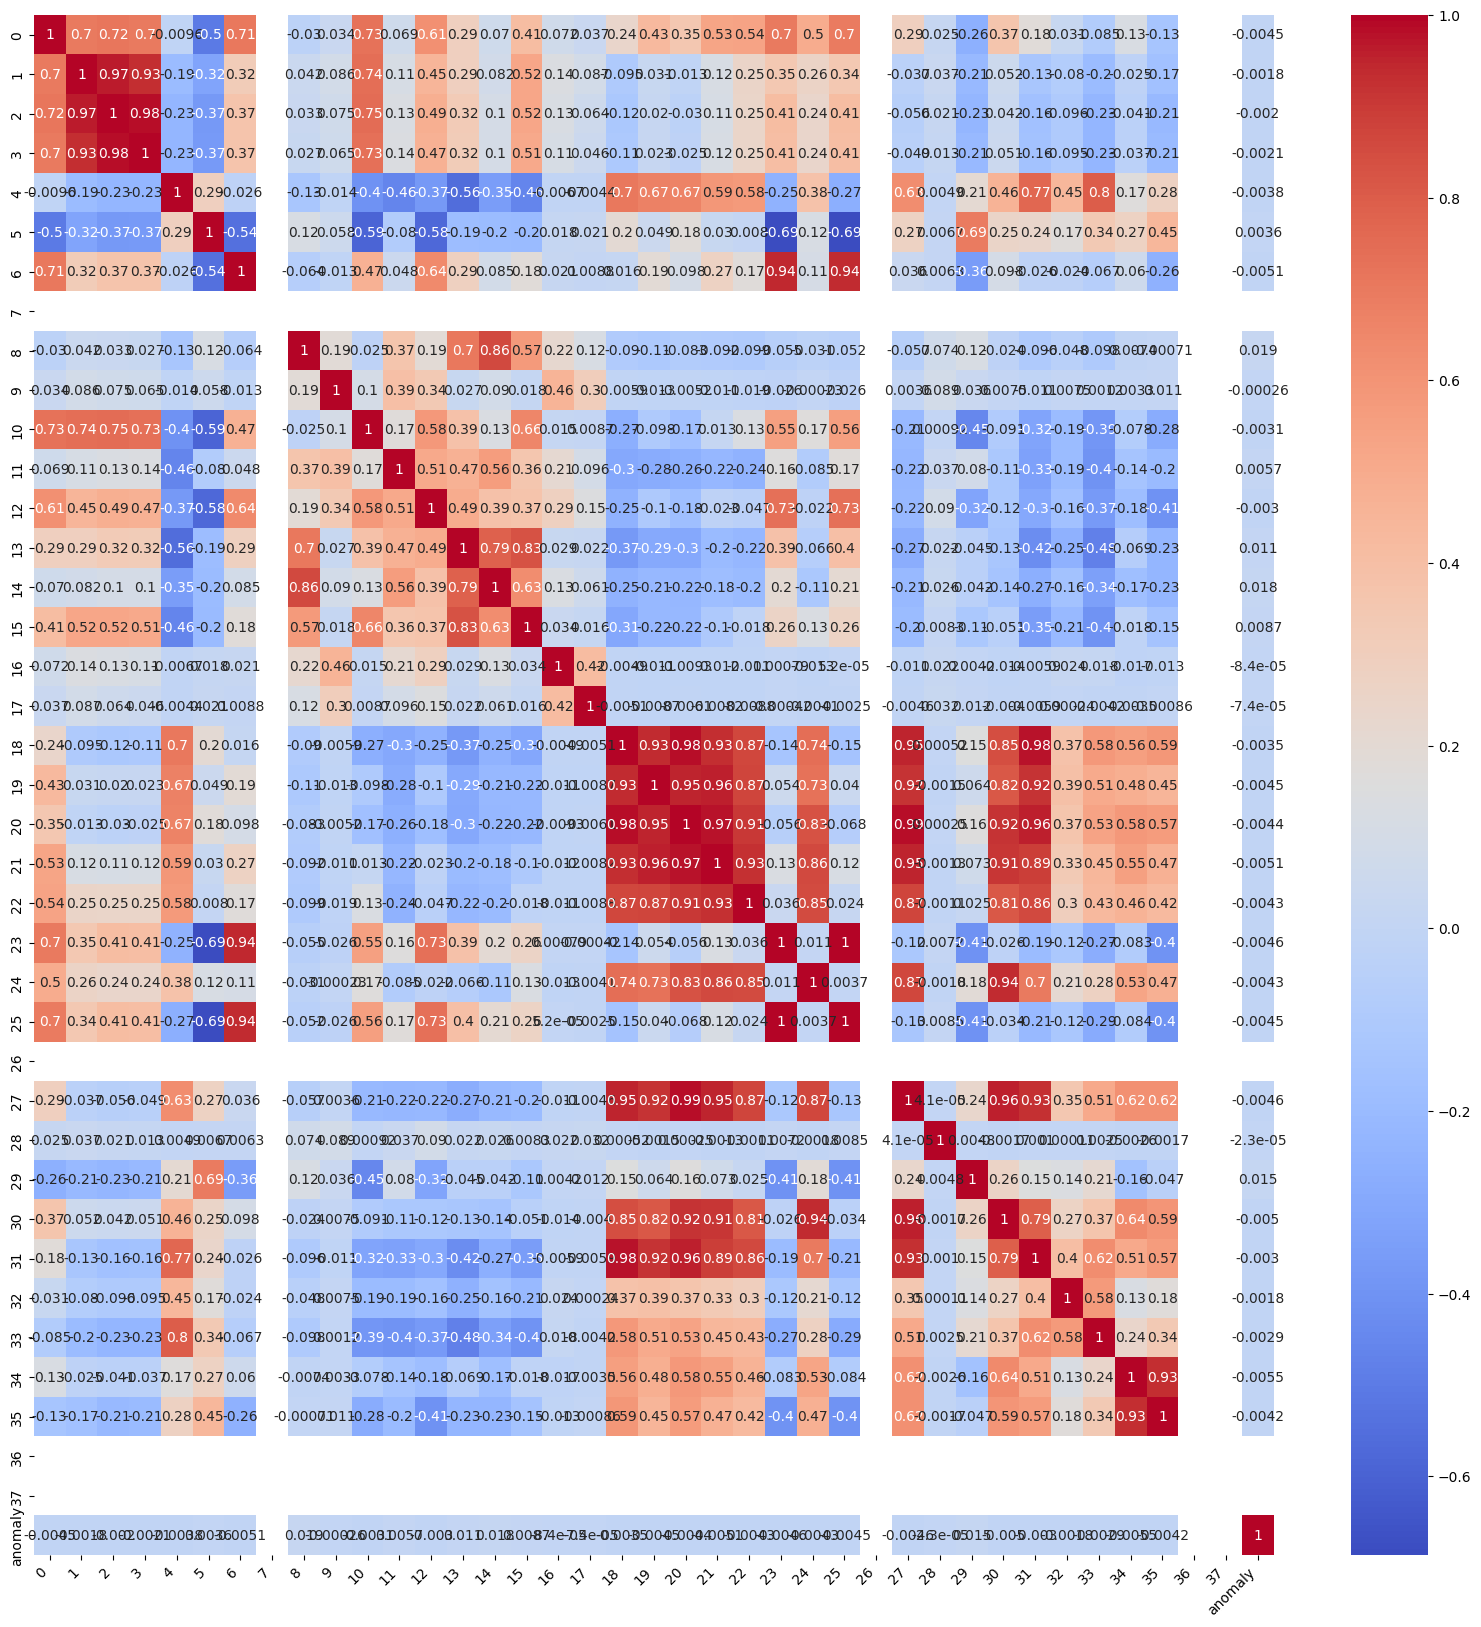

In [25]:
corr = test_df.corr()
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [28]:
# d) Find out the variables which are the root cause for the anomaly
correlations = test_df.corrwith(test_df['anomaly'])
print(correlations)

c:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0          0.442662
1          0.774581
2          0.645759
3          0.600126
4         -0.053281
5         -0.080371
6          0.018491
7               NaN
8          0.078449
9          0.115880
10         0.533616
11         0.069720
12         0.226729
13         0.132431
14         0.030471
15         0.416753
16         0.153026
17         0.086068
18        -0.037488
19         0.016954
20         0.016337
21         0.078163
22         0.209641
23         0.030496
24         0.268842
25         0.028449
26              NaN
27         0.010120
28         0.051994
29        -0.036804
30         0.058646
31        -0.039312
32        -0.012464
33        -0.060278
34        -0.060832
35        -0.070299
36              NaN
37              NaN
anomaly    1.000000
z_score    0.442662
outlier    1.000000
dtype: float64


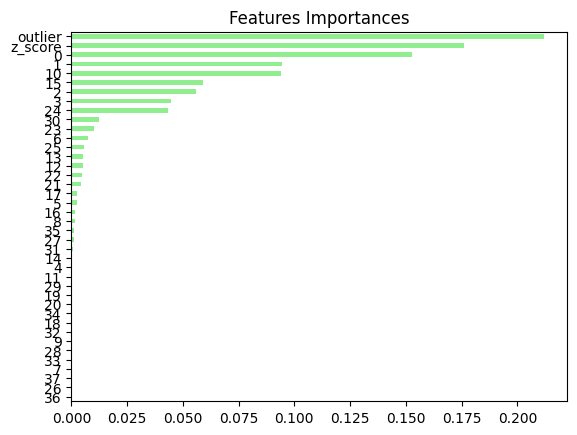

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'anomaly' is target variable
X = test_df.drop('anomaly', axis=1)
y = test_df['anomaly']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(data=model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()
